# Power Law - Norm Relations on Random Heavy Tailed (Pareto) data

### 1. (fit) Power Law exponent $(\alpha)$  vs.  Soft Rank in log units
$\alpha\;$ vs $\;\dfrac {\log_{10}\;\Vert W\Vert^{2}_{F}}{\log_{10}\;\lambda_{max}}$ 

### 2. Universality capacity control metric $(\hat{\alpha})$  vs.  log Frobenius norm

$\alpha\log_{10}\lambda_{max}\;$ vs. $\;\log_{10}\Vert W\Vert^{2}_{F} $

### 3.  (fit) Power Law exponent $(\alpha)$  vs.  log Frobenius norm

$\alpha\;$ vs. $\;\log_{10}\Vert W\Vert^{2}_{F} $


### 4.  (fit) Power Law exponent $(\alpha)$  vs.  log Spectral norm (max eigenvalue)

$\alpha\;$ vs. $\;\log_{10}\lambda^{max} $

### 5.  (model) Power Law exponent $(\mu)$  vs.  log Frobenius norm

$\mu\;$ vs $\;\log_{10}\Vert \mathbf{W}^{rand}(\mu)\Vert^{2}_{F}$




In [61]:
import numpy as np
from tqdm import tqdm_notebook as tqdm

import powerlaw

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [3]:
Q=1

Ms = [100, 500, 1000, 5000, 10000]
mus = [0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 4, 4.5, 5]
Mresults = {}
for M in Ms:        
    alphas, norms, lmaxs =  [], [], []

    N = Q*M
    for mu in mus:
        #mu = 5 * np.random.random_sample() + 0.5


        W = np.random.pareto(a=mu,size=(N,M))
        normW = np.linalg.norm(W)

        X=np.dot(W.T,W)/N
        
        evals = np.linalg.eigvals(X)
        l_max = np.max(evals)
        
        fit =  powerlaw.Fit(evals, xmax=l_max, verbose=False)
        a = fit.alpha
        
        alphas.append(a)
        norms.append(normW)
        lmaxs.append(l_max)

        Mresults[M]=[np.array(alphas),np.array(norms), np.array(lmaxs)]

       

/Users/charleshmartin/anaconda3/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/charleshmartin/anaconda3/lib/python3.6/site-packages/powerlaw.py:104: ComplexWarning: Casting complex values to real discards the imaginary part
  self.xmax = float(self.xmax)
/Users/charleshmartin/anaconda3/lib/python3.6/site-packages/powerlaw.py:1160: RuntimeWarning: invalid value encountered in log
  return 1 + len(data)/sum(log(data / (self.xmin)))
/Users/charleshmartin/anaconda3/lib/python3.6/site-packages/powerlaw.

In [64]:
colors=['blue','green', 'teal', 'purple', 'red']


In [95]:
plt.rcParams['figure.figsize'] = [10,10]
matplotlib.rcParams.update({'font.size': 24})
legend_prop={'size':20}
marker_size = 75


/Users/charleshmartin/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:553: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


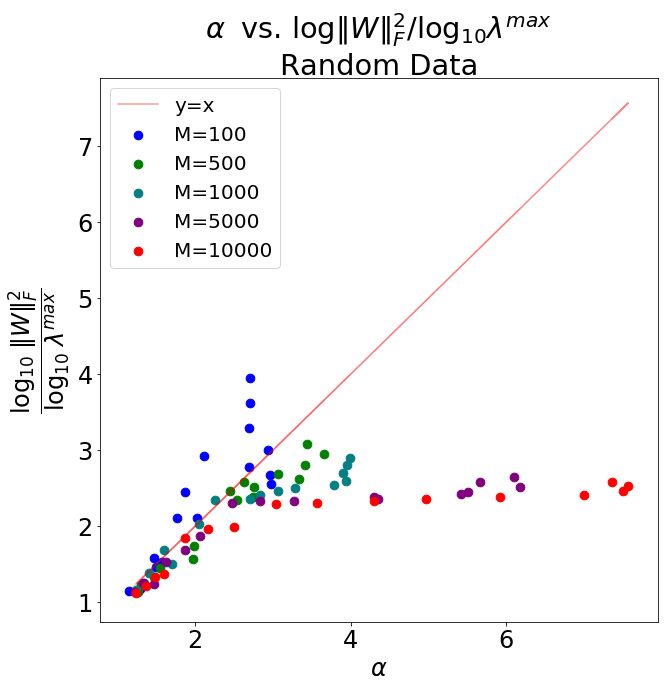

In [96]:


plt.title(r"$\alpha\;$ vs. $\log\Vert W\Vert^{2}_{F} / \log_{10}\lambda^{max}$"+"\nRandom Data")
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$\dfrac {\log_{10}\;\Vert W\Vert^{2}_{F}}{\log_{10}\;\lambda^{max}}$")
plt.plot(alphas,alphas, color='red', alpha=0.4, label="y=x")
   

for im, M in enumerate(Ms):
    [alphas, norms, lmaxs] = Mresults[M]
    x = alphas
    y = np.divide(2.0*np.log10(norms),np.log10(lmaxs))
    plt.scatter(x,y, label="M={}".format(M), color=colors[im],s=marker_size)
    plt.plot(x,x, color='red', alpha=0.1)


plt.legend(prop=legend_prop)
plt.show()

/Users/charleshmartin/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/charleshmartin/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:553: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


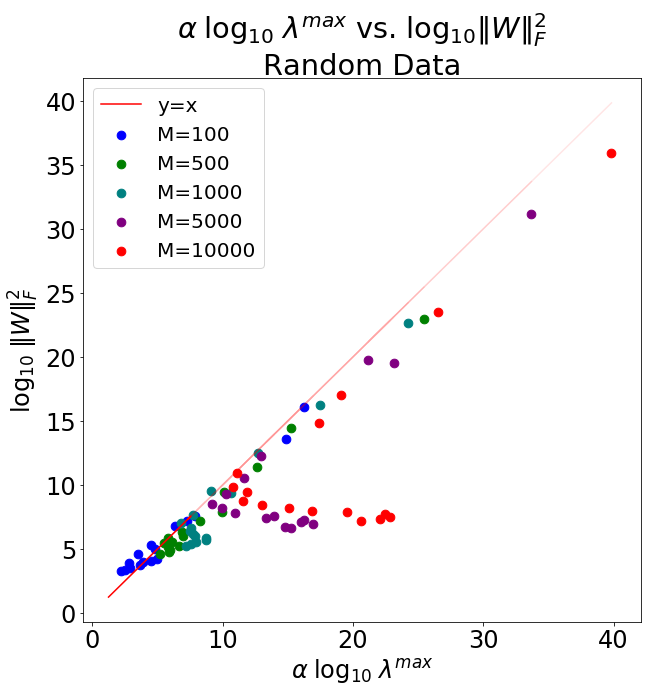

In [97]:


plt.title(r"$\alpha\;\log_{10}\;\lambda^{max}$ vs. $\log_{10}\Vert W\Vert^{2}_{F}$"+"\nRandom Data")
plt.xlabel(r"$\alpha\;\log_{10}\;\lambda^{max}$")
plt.ylabel(r"$\log_{10}\;\Vert W\Vert^{2}_{F}$")
plt.plot(alphas,alphas, color='red', alpha=1.0, label="y=x")
   

for im, M in enumerate(Ms):
    [alphas, norms, lmaxs] = Mresults[M]
    x = np.multiply(alphas ,np.log10(lmaxs) )
    y = 2.0*np.log10(norms)
    plt.plot(x,x, color='red', alpha=0.1)

    plt.scatter(x,y, label="M={}".format(M), color=colors[im],s=marker_size)

plt.legend(prop=legend_prop)
plt.savefig("img/relation-rand.png")
plt.show()

/Users/charleshmartin/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/charleshmartin/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:553: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


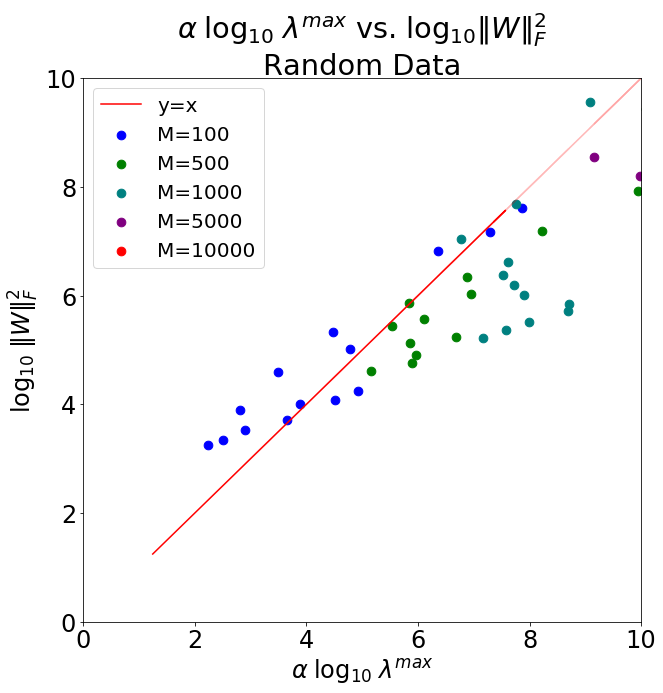

In [99]:


plt.title(r"$\alpha\;\log_{10}\;\lambda^{max}$ vs. $\log_{10}\Vert W\Vert^{2}_{F}$"+"\nRandom Data")
plt.xlabel(r"$\alpha\;\log_{10}\;\lambda^{max}$")
plt.ylabel(r"$\log_{10}\;\Vert W\Vert^{2}_{F}$")
plt.plot(alphas,alphas, color='red', alpha=1.0, label="y=x")
   

for im, M in enumerate(Ms):
    [alphas, norms, lmaxs] = Mresults[M]
    x = np.multiply(alphas ,np.log10(lmaxs) )
    y = 2.0*np.log10(norms)
    plt.plot(x,x, color='red', alpha=0.1)

    plt.scatter(x,y, label="M={}".format(M), color=colors[im],s=marker_size)

plt.legend(prop=legend_prop)
plt.xlim(0,10)
plt.ylim(0,10)

plt.show()

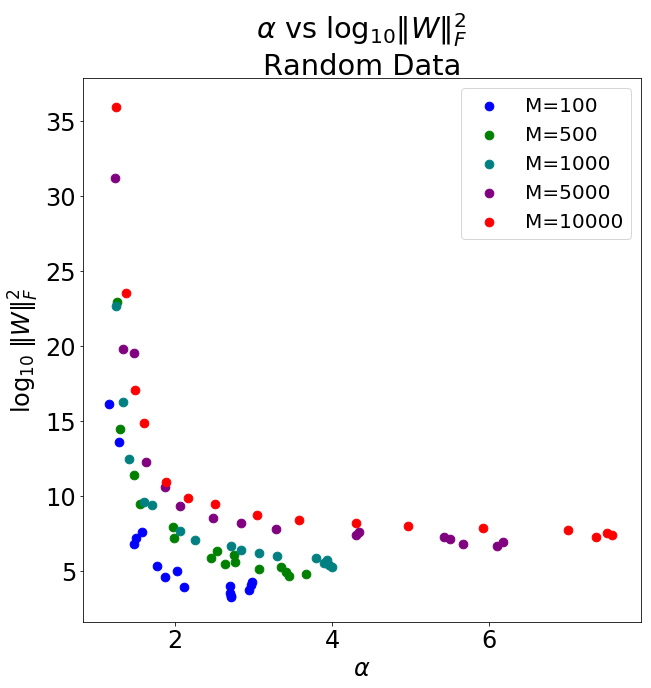

In [92]:


plt.title(r"$\alpha$ vs $\log_{10}\Vert W\Vert^{2}_{F}$"+"\nRandom Data")
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$\log_{10}\;\Vert W\Vert^{2}_{F}$")
   

for im, M in enumerate(Ms):
    [alphas, norms, lmaxs] = Mresults[M]
    x = alphas 
    y = 2.0*np.log10(norms)
    plt.scatter(x,y, label="M={}".format(M), color=colors[im],s=marker_size)

plt.legend(prop=legend_prop)
plt.show()

/Users/charleshmartin/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:553: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


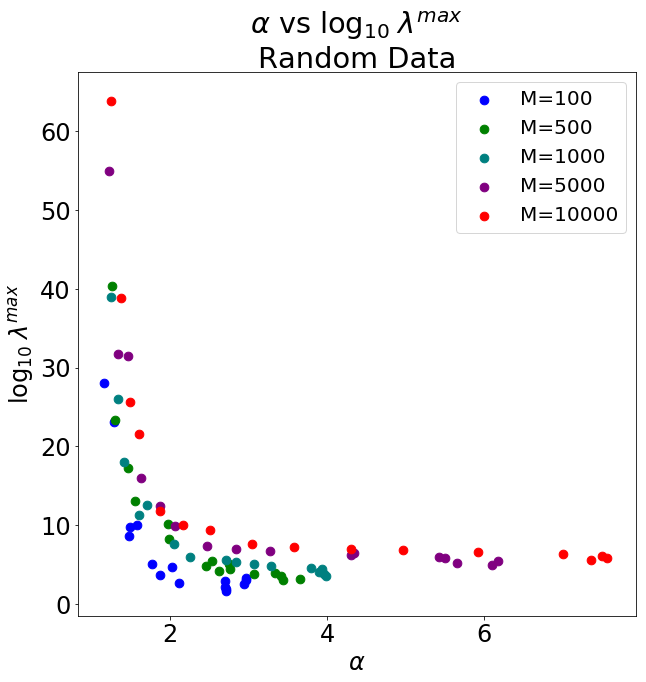

In [100]:


plt.title(r"$\alpha$ vs $\log_{10}\;\lambda^{max}$"+"\nRandom Data")
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$\log_{10}\;\lambda^{max}$")
   

for im, M in enumerate(Ms):
    [alphas, norms, lmaxs] = Mresults[M]
    x = alphas 
    y = 2.0*np.log10(lmaxs)
    plt.scatter(x,y, label="M={}".format(M), color=colors[im],s=marker_size)

plt.legend(prop=legend_prop)
plt.show()

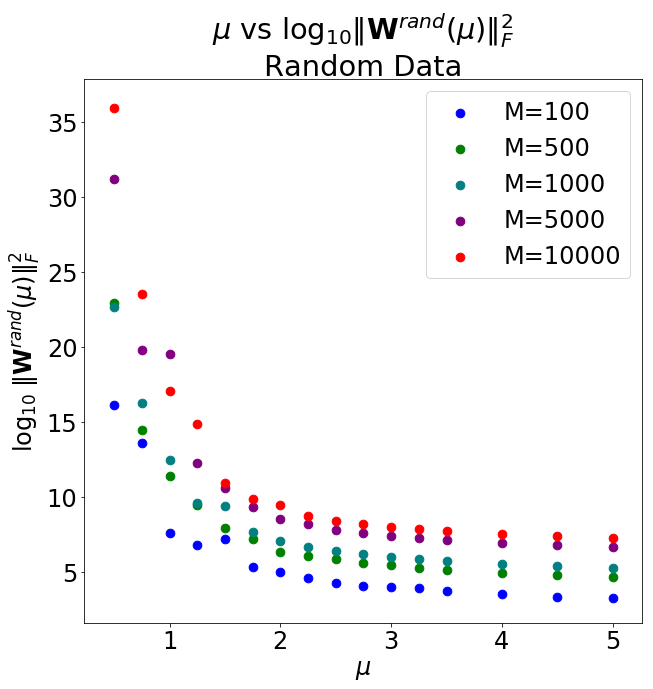

In [94]:


plt.title(r"$\mu$ vs $\log_{10}\Vert \mathbf{W}^{rand}(\mu)\Vert^{2}_{F}$"+"\nRandom Data")
plt.xlabel(r"$\mu$")
plt.ylabel(r"$\log_{10}\;\Vert \mathbf{W}^{rand}(\mu)\Vert^{2}_{F}$")
   

for im, M in enumerate(Ms):
    [alphas, norms, lmaxs] = Mresults[M]
    x = mus 
    y = 2.0*np.log10(norms)
    plt.scatter(x,y, label="M={}".format(M), color=colors[im],s=marker_size)

plt.legend(prop=legend_prop)
plt.savefig("img/fro-rand.png")
plt.show()



Text(0,0.5,'$\\mu/2 + 1$')

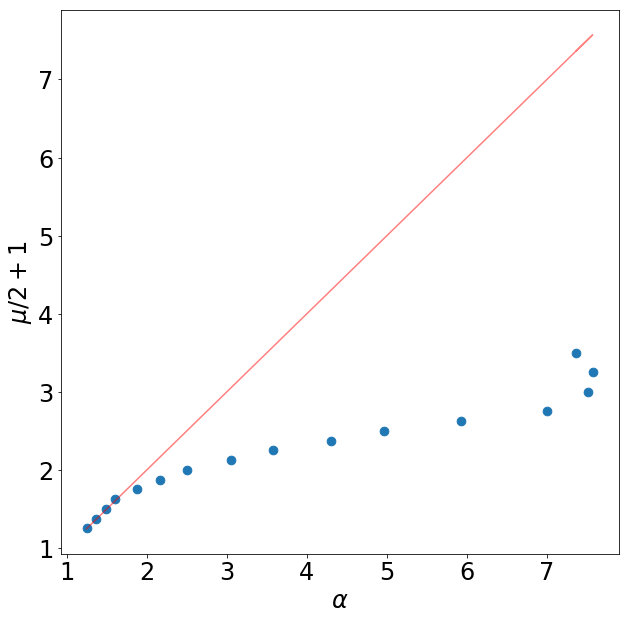

In [101]:
plt.scatter(alphas, 0.5*np.array(mus)+1.0, s=marker_size)
plt.plot(alphas, alphas, color='red', alpha=0.5)

plt.xlabel(r"$\alpha$")
plt.ylabel(r"$\mu/2 + 1$")